In [74]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading Data
dataset= load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']= df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter For Data Scientist Data
df_DS= df[df["job_title_short"]=="Data Scientist"].copy()

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\bijar\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Sun Jul 28 16:36:31 2024).


TypeError: 'str' object is not callable

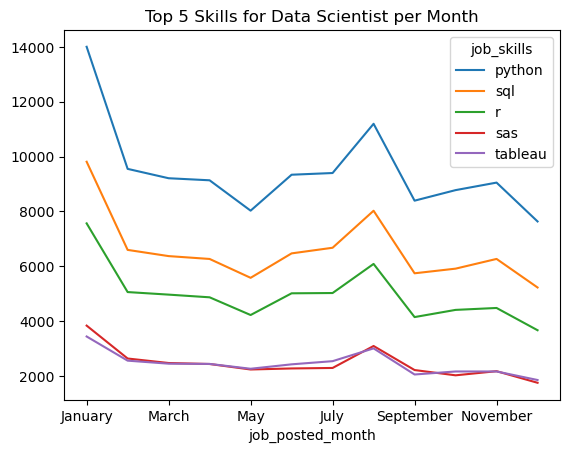

In [75]:
df_DS= df[df["job_title_short"]=="Data Scientist"].copy()
#create a new column for month number
df_DS['job_posted_month_no']=df_DS['job_posted_date'].dt.month
# Explode the Job SKills Column and pivot
df_DS_explode=df_DS.explode("job_skills")
df_DS_pivot=df_DS_explode.pivot_table(index='job_posted_month_no',columns='job_skills', aggfunc='size',fill_value=0)
#Sort the Skill by Count
df_DS_pivot.loc['Total']=df_DS_pivot.sum()
df_DS_pivot=df_DS_pivot[df_DS_pivot.loc['Total'].sort_values(ascending=False).index]
df_DS_pivot=df_DS_pivot.drop('Total')

# Use month names for plotting 
df_DS_pivot=df_DS_pivot.reset_index()
df_DS_pivot['job_posted_month']=df_DS_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%B'))
df_DS_pivot=df_DS_pivot.set_index('job_posted_month')
df_DS_pivot=df_DS_pivot.drop(columns='job_posted_month_no')

#Get the top 5 skills 
df_DS_pivot.iloc[:,:5].plot(kind='line')

plt.title("Top 5 Skills for Data Scientist per Month")
plt.ylabel("Count")
plt.xlabel("")
plt.legend()
plt.show()


In [ ]:
df_DS_pivot

job_skills,python,sql,r,sas,tableau,aws,spark,azure,tensorflow,excel,...,huggingface,fastify,esquisse,workfront,play framework,wimi,shogun,mattermost,nuxt.js,sqlserver
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,13998,9811,7566,3842,3446,3253,3222,2582,2316,2132,...,0,0,0,0,0,0,0,0,0,0
February,9551,6600,5064,2644,2566,2089,2085,1716,1525,1453,...,0,0,1,0,0,0,0,0,0,0
March,9210,6374,4971,2480,2456,2092,1992,1727,1405,1440,...,0,0,0,1,0,0,1,0,0,0
April,9135,6270,4873,2444,2447,2055,1905,1665,1546,1456,...,0,2,0,0,0,0,0,0,0,0
May,8029,5583,4228,2244,2271,1921,1716,1442,1271,1202,...,0,0,0,0,0,0,0,0,0,0
June,9338,6473,5019,2282,2432,2173,2072,1739,1580,1324,...,0,1,1,0,0,0,0,0,0,0
July,9400,6678,5029,2300,2547,2207,1972,1845,1535,1425,...,1,0,0,0,0,0,0,0,0,0
August,11193,8026,6089,3100,3013,2571,2466,2130,1972,1795,...,0,0,0,0,1,0,0,0,0,0
September,8393,5748,4153,2224,2062,1923,1820,1704,1462,1352,...,3,0,0,0,0,0,0,0,0,0


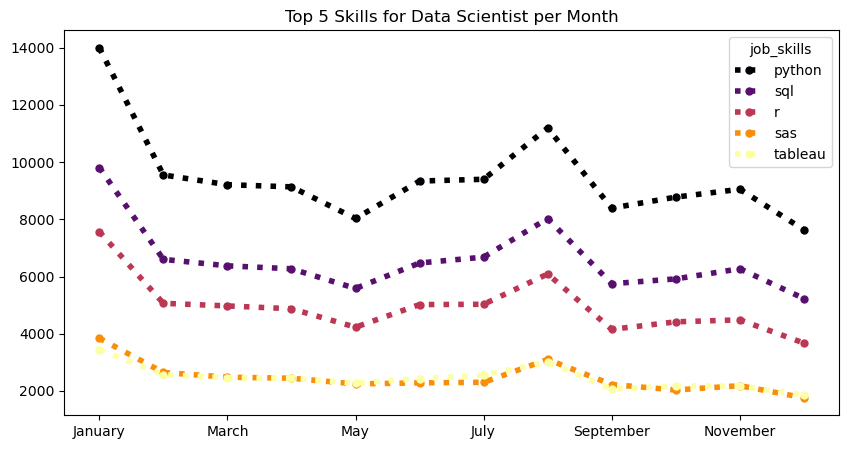

In [ ]:
df_DS_pivot.iloc[: , :5].plot(
    kind='line',
    linewidth=4,
    linestyle=":", #options: '-','--',':','-.'
    colormap="inferno",
    marker='o',
    markersize=5,
    figsize=(10,5)
    )

plt.title("Top 5 Skills for Data Scientist per Month")
plt.ylabel=('Count')
plt.xlabel('')
plt.show()

In [ ]:
#Explode the "job_skills" into individual rows
df_exploded=df.explode('job_skills')
#Calculate the average salary and count of  job postings per skill
skill_stats=df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills' ,'count'),
    median_salary=('salary_year_avg',"median")
)

#limits to the top skills
skill_count= 20

skill_stats=skill_stats.sort_values(by="skill_count",ascending=False).head(skill_count)

skill_stats

,skill_count,median_salary
job_skills,,
sql,384849,120000.0
python,380909,125000.0
aws,145381,135000.0
azure,132527,125000.0
r,130892,119550.0
tableau,127213,111175.0
excel,127018,92500.0
spark,114609,140000.0
power bi,98147,102000.0


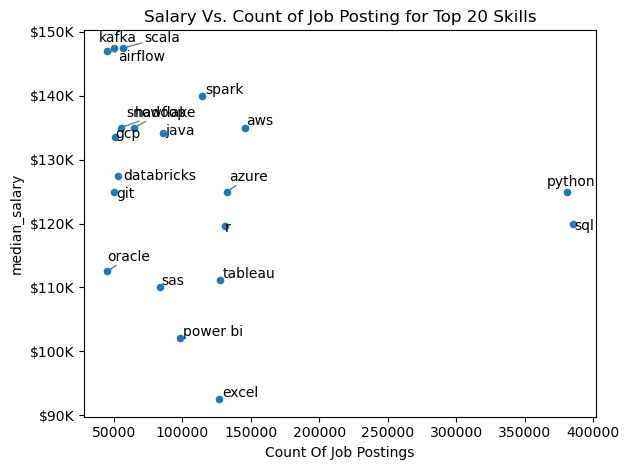

In [81]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter' , x='skill_count' , y='median_salary')
texts=[]
for i,txt in enumerate(skill_stats.index):
   texts.append( plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i],txt))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray", lw=1))

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

#plt.ylabel("Median  salary") 
plt.xlabel("Count Of Job Postings")

plt.title(f"Salary Vs. Count of Job Posting for Top {skill_count} Skills")
plt.tight_layout()
plt.show()

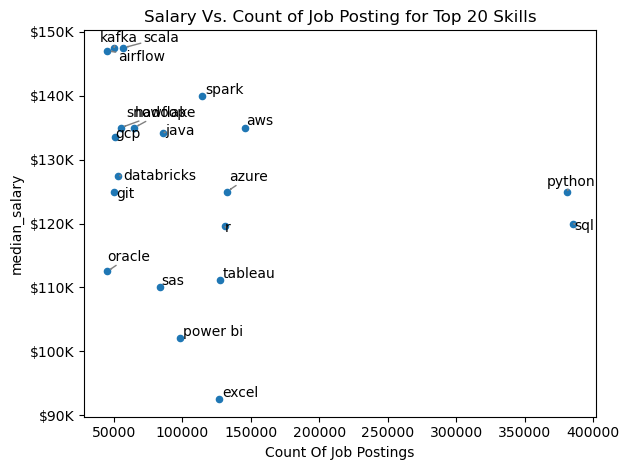

In [82]:
skill_stats.plot(kind='scatter' , x='skill_count' , y='median_salary')
texts=[]
for i,txt in enumerate(skill_stats.index):
   texts.append( plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i],txt))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray", lw=1))

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.xlabel("Count Of Job Postings")
#plt.ylabel("Median Yearly Salary") 
plt.title(f"Salary Vs. Count of Job Posting for Top {skill_count} Skills")
plt.tight_layout()
plt.show()
